In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import joblib


from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight


from keras.layers import Activation, Dense, Dropout







from tensorflow.keras.models import Sequential








df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df.head()

2023-12-13 03:46:14.299552: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-13 03:46:14.327891: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 03:46:14.327916: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 03:46:14.329025: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 03:46:14.334346: I tensorflow/core/platform/cpu_feature_guar

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [3]:
df = df.drop(columns = ['GenHlth', 'MentHlth','PhysHlth','Income','Education'])
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex',
       'Age'],
      dtype='object')

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  DiffWalk              253680 non-null  float64
 15  

In [5]:
df['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

In [6]:
y = df['HeartDiseaseorAttack'].values
X = df.drop(columns='HeartDiseaseorAttack', axis=1).values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [68]:
# Saving Scaler to be use in flask app  

joblib.dump(scaler, "./Models/scaler_model.save")


['./Models/scaler_model.save']

In [9]:

# Calculate class weights which could be used in training
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

In [10]:
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(Dense(units=128, activation = "relu", input_dim= len(X_train[0])))
nn.add(Dropout(0.5))

# Second hidden layer
nn.add(Dense(units=64, activation = "relu"))
nn.add(Dropout(0.5))
# Third hidden layer
nn.add(Dense(32, activation="relu"))
nn.add(Dropout(0.5))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2176      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

2023-12-13 03:47:22.131057: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-13 03:47:22.153187: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-13 03:47:22.153603: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [11]:
nn.compile(loss="binary_crossentropy", optimizer= "adam", metrics= ["accuracy"])

In [12]:
# Implementing early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [13]:
nn_fitted = nn.fit(X_train_scaled, y_train, epochs=100, batch_size=40, class_weight=class_weights, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100


2023-12-13 03:48:09.973911: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:185] failed to create cublas handle: the resource allocation failed
2023-12-13 03:48:09.973934: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:188] Failure to initialize cublas may be due to OOM (cublas needs some free memory when you initialize it, and your deep-learning framework may have preallocated more than its fair share), or may be because this binary was not built with support for the GPU in your machine.
2023-12-13 03:48:09.973949: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at matmul_op_impl.h:817 : INTERNAL: Attempting to perform BLAS operation using StreamExecutor without BLAS support
2023-12-13 03:48:09.973968: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 8428643618001769499


InternalError: Graph execution error:

Detected at node sequential/dense/MatMul defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_1858914/708015744.py", line 1, in <module>

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/layers/core/dense.py", line 241, in call

Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[{{node sequential/dense/MatMul}}]] [Op:__inference_train_function_1375]

In [25]:
nn_fitted = nn.fit(X_train_scaled,y_train, epochs=150,batch_size=32)

Epoch 1/150
6342/6342 [==============================] - 15s 2ms/step - loss: 0.2722 - accuracy: 0.9050
Epoch 2/150
6342/6342 [==============================] - 16s 3ms/step - loss: 0.2577 - accuracy: 0.9058
Epoch 3/150
6342/6342 [==============================] - 15s 2ms/step - loss: 0.2562 - accuracy: 0.9054
Epoch 4/150
6342/6342 [==============================] - 15s 2ms/step - loss: 0.2553 - accuracy: 0.9060
Epoch 5/150
6342/6342 [==============================] - 15s 2ms/step - loss: 0.2550 - accuracy: 0.9055
Epoch 6/150
6342/6342 [==============================] - 15s 2ms/step - loss: 0.2555 - accuracy: 0.9058
Epoch 7/150
6342/6342 [==============================] - 15s 2ms/step - loss: 0.2549 - accuracy: 0.9055
Epoch 8/150
6342/6342 [==============================] - 16s 2ms/step - loss: 0.2550 - accuracy: 0.9058
Epoch 9/150
6342/6342 [==============================] - 14s 2ms/step - loss: 0.2549 - accuracy: 0.9059
Epoch 10/150
6342/6342 [==============================] - 14s 2m

In [27]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1586/1586 - 2s - loss: 0.2540 - accuracy: 0.9060 - 2s/epoch - 1ms/step
Loss: 0.25404152274131775, Accuracy: 0.9060233235359192


In [28]:
nn.save("./Models/Heart_Disease_Pred.h5")

/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# TESTING THE MODEL

In [49]:
# Predicting the probabilities of the positive class for the ROC-AUC score
y_pred_probs = nn.predict(X_test_scaled)

# Predicting class labels for the confusion matrix, precision, recall, and F1-score
y_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")

1586/1586 [==============================] - 1s 737us/step


In [50]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[45968     0]
 [ 4768     0]]


In [40]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[45248   720]
 [ 4186   582]]


In [51]:
# Precision
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))


Precision: 0.00


/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
# Recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))


Recall: 0.00


In [53]:
# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score: {:.2f}".format(f1))


F1-Score: 0.00


In [54]:

# ROC-AUC Score
# Ensure y_pred_probs are the probabilities of the positive class (class 1)
roc_auc = roc_auc_score(y_test, y_pred_probs)
print("ROC-AUC Score: {:.2f}".format(roc_auc))

ROC-AUC Score: 0.83


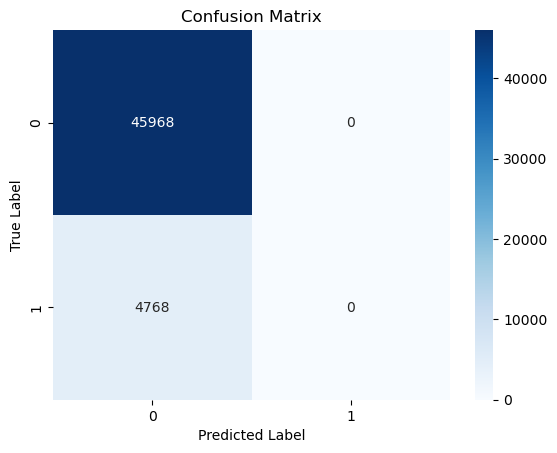

In [55]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Reloading Model and Predicting

In [56]:
reloded_Heart_Disease_Pred = keras.models.load_model("Models/Heart_Disease_Pred.h5")

In [57]:
new_data = [[0, 0, 1, 18,
       0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0,33]]

In [58]:
new_data_df = pd.DataFrame(new_data, columns=['HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex','Age'])
new_data_scaled = scaler.transform(new_data_df)

/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [59]:
prediction = reloded_Heart_Disease_Pred.predict(new_data_scaled)

1/1 [==============================] - 0s 46ms/step


In [60]:
print(f"prediction: {prediction}")

prediction: [[7.4870906e-29]]
